# How to evaluate percentages?

Percentage is one of the most common mathematical concept. At this time of world cup, a poll has been conducted to evaluate the football enthusiasm of the french population. It appeared that 64% of surveyed people declared they planned to watch the games.
<img src="img/french_rooster.jpg" alt="Frenchy" style="width: 200px;"/>

This percentage has an error estimation attached to it and the bigger the error the less likely the percentage to be accurate. This error rate is seldom mentioned in the news. The goal of this tutorial is to show how to assess whether a percentage or a probability has been correctly estimated and how big the error estimation is. Let's use the example of the poll on football as an illustration.

_Allez les bleus !!!_

#### Definition
The percentage of people planning to watch the football games is defined as the number of people planning to watch the games divided by the number of surveyed people.

In [2]:
def rate(number_of_people_watching_games, number_of_surveyed_persons):
    return round(100.* number_of_people_watching_games / number_of_surveyed_persons, 2)

number_of_people_watching_games = 640
number_of_surveyed_persons = 1000
print("If {0} persons plan to watch the footbal games "
      "over {1} surveyed persons, "
      "then the percentage is {2}%"
      .format(number_of_people_watching_games, 
              number_of_surveyed_persons, 
              rate(number_of_people_watching_games, number_of_surveyed_persons)))

If 640 persons plan to watch the footbal games over 1000 surveyed persons, then the percentage is 64.0%


#### Problem
What if only 10 persons would have been surveyed? Would you feel confident generalizing to the rest of the population of the country?
To answer that question, several statistical tools can be used.

## Bootstrapping

#### Definition

Bootstrapping consists in randomly sampling observations with replacement, that is, every surveyed person is independent from each other and the probability of getting an certain answer does not affect the probability of the answer of the next person. 

#### Illustrated version

Imagine 10 persons to be surveyed are in a room. There are also 10 interviewers. The first investigator picks someone in the room, conduct the survey and brings the person back to the room. Then, the second investigator repeats the same process. And so on with the next 8 interviewers.

This will give us the percentage of people planning to watch the games.

**Question**: is this percentage accurate?

Not sure. So we will repeat the process several times to check whether it is reliable or not.

In [3]:
import random

number_people_in_the_room = 10
number_people_watching_the_games = int(0.64 * number_people_in_the_room)
number_people_not_watching_the_games = number_people_in_the_room - number_people_watching_the_games
people_in_the_room = ['watching'] * number_people_watching_the_games + \
                     ['not watching'] * number_people_not_watching_the_games

def pick_random_person(people_in_the_room, number_people_in_the_room):
    person_index = random.randint(0, number_people_in_the_room - 1)
    return people_in_the_room[person_index]

def pick_many_times(people_in_the_room, number_people_in_the_room):
    number_people_watching_the_games = 0
    for i in range(number_people_in_the_room):
        ball = pick_random_person(people_in_the_room, number_people_in_the_room)
        if ball == 'watching':
            number_people_watching_the_games += 1
    return round(100.*number_people_watching_the_games / number_people_in_the_room, 2)

print("{0}% of surveyed persons plan to watch the games.".format(pick_many_times(people_in_the_room, number_people_in_the_room)))

70.0% of surveyed persons plan to watch the games.


We can observe that for a sample of only 10 persons, the percentage is very unreliable. Conversely if we increase the sample size, the estimation of the percentage is more accurate. 

Let's repeat the experience 1000 times for different sample sizes.

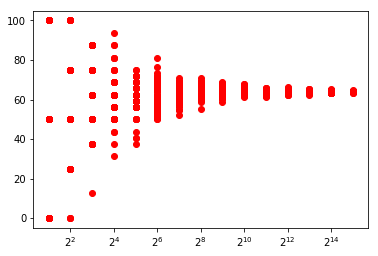

In [4]:
from matplotlib import pyplot as plt
import random

number_people_in_the_room_list = [2**i for i in range(1,16)]
X,Y = [],[]
for i in range(1000):
    number_people_in_the_room = random.choice(number_people_in_the_room_list)
    number_people_watching_the_games = int(0.64 * number_people_in_the_room)
    number_people_not_watching_the_games = number_people_in_the_room - number_people_watching_the_games
    people_in_the_room = ['watching'] * number_people_watching_the_games + \
                         ['not watching'] * number_people_not_watching_the_games
    percentage_watching_the_games = pick_many_times(people_in_the_room, number_people_in_the_room)
    X.append(number_people_in_the_room)
    Y.append(percentage_watching_the_games)
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.plot(X, Y, 'ro')
plt.show()

So, how can we assess the certainty of a calculated percentage? One option consists in computing the average value of the percentages over each trial, and the standard deviation. In the following plot, bars are for 2 standard deviation since we want to get confidence intervals with a 95% precision.

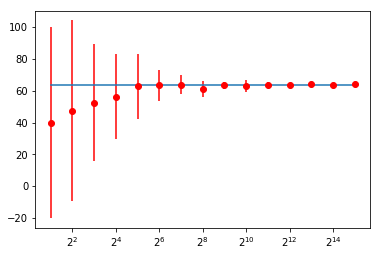

In [39]:
from matplotlib import pyplot as plt
import random
import numpy as np

number_people_in_the_room_list = [2**i for i in range(1,16)]
X,Y,Yerr = [],[],[]
for number_people_in_the_room in number_people_in_the_room_list:
    percentage_people_watching_the_games = []
    for i in range(10):
        number_people_watching_the_games = int(0.64 * number_people_in_the_room)
        number_people_not_watching_the_games = number_people_in_the_room - number_people_watching_the_games
        people_in_the_room = ['watching'] * number_people_watching_the_games + \
                             ['not watching'] * number_people_not_watching_the_games
        percentage_people_watching_the_games.append(pick_many_times(people_in_the_room, number_people_in_the_room))
    X.append(number_people_in_the_room)
    Y.append(np.mean(percentage_people_watching_the_games))
    Yerr.append(2*np.std(percentage_people_watching_the_games))
plt.clf()
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.errorbar(X, Y, fmt='ro', yerr=Yerr)
ax.plot(X, [64]*len(X))
plt.show()

In [40]:
for i,x in enumerate(X):
    print("For {0} surveyed persons, the percentage of persons watching the games is {1} (± {2})%".format(x, round(Y[i],1), round(Yerr[i],1)))

For 2 surveyed persons, the percentage of persons watching the games is 40.0 (± 60.0)%
For 4 surveyed persons, the percentage of persons watching the games is 47.5 (± 56.8)%
For 8 surveyed persons, the percentage of persons watching the games is 52.5 (± 36.7)%
For 16 surveyed persons, the percentage of persons watching the games is 56.3 (± 26.8)%
For 32 surveyed persons, the percentage of persons watching the games is 62.8 (± 20.6)%
For 64 surveyed persons, the percentage of persons watching the games is 63.4 (± 9.6)%
For 128 surveyed persons, the percentage of persons watching the games is 64.0 (± 6.0)%
For 256 surveyed persons, the percentage of persons watching the games is 61.1 (± 4.9)%
For 512 surveyed persons, the percentage of persons watching the games is 63.5 (± 2.2)%
For 1024 surveyed persons, the percentage of persons watching the games is 63.0 (± 3.7)%
For 2048 surveyed persons, the percentage of persons watching the games is 63.7 (± 1.9)%
For 4096 surveyed persons, the per

### The binomial confidence interval

Bootstrapping is nice but sampling is a pretty heavy process for evaluating a percentage.

**Question**: Is there a way to compute directly the confidence using the numbers of surveyed persons and the percentage?

Of course, there is! This is called the binomial estimator. 

The binomial estimator considers the problem the opposite way: how likely it is that my observations are sampled from my percentage. Concretely, I know that I 64% of french people plan to watch the games, how likely is it that in my sample of 100 persons, 64 of them are going to watch the football games?

In [9]:
from scipy.stats import binom

L = binom.pmf(n=100, k=64, p=0.64)
print("For 100 surveyed persons, the probability that 64 of them plan to watch the game, if the expected percentage is 64%, is equal to {}% \n".format(round(100*L, 2)))

L = binom.pmf(n=10000, k=6400, p=0.64)
print("For 10,000 surveyed persons, the probability that 6,400 of them plan to watch the game, if the expected percentage is 64%, is equal to {}%".format(round(100*L, 2)))

For 100 surveyed persons, the probability that 64 of them plan to watch the game, if the expected percentage is 64%, is equal to 8.29% 

For 10,000 surveyed persons, the probability that 6,400 of them plan to watch the game, if the expected percentage is 64%, is equal to 0.83%


This is quite counterintuitive: the more there are observations, the less it is reliable.

But it is also more likely to find randomly 64 persons planning to watch the games over 100 surveyed people than 6,400 over 10,000.

In [10]:
L = 1/100.
print("The probability to randomly find 64 persons planning to watch the games over 100 surveyed people is {}%".format(round(100*L, 2)))

L = 1/10000.
print("The probability to randomly find 6,400 persons planning to watch the games over 10,000 surveyed people is {}%".format(round(100*L, 2)))

The probability to randomly find 64 persons planning to watch the games over 100 surveyed people is 1.0%
The probability to randomly find 6,400 persons planning to watch the games over 10,000 surveyed people is 0.01%


**Question**: How to derive the confidence interval from it?

Let's do some maths! Let's write the binomial estimator as a conditional probability: $P(k \mid n, p)$. 

**Example**: In the survey published in the news, 1,000 persons were surveyed. Then, $P(k=640 \mid n=1000, p=0.64)$ denotes the probability to find 640 persons planning to watch the games over 1,000 surveyed people knowing that the expected percentage is 64%.

Let's suppose that we want to have a confidence interval with a 95% precision, that is an error rate of 5%.

We can then iterate over k from 1 and sum $P(k \mid n, p)$, until we hit half of the error rate, i.e 2.5%:

$$P(k=1 \mid n=1000, p=0.64)+P(k=2 \mid n=1000, p=0.64)+...+P(k=x_L \mid n=1000, p=0.64) = 2.5\%$$

In [23]:
L=0
for k in range(1,1000):
    L += binom.pmf(n=1000, k=k, p=0.64)
    if L>0.025:
        print "Lower bound of the 95% confidence interval is when we hit k={}".format(k)
        break

Lower bound of the 95% confidence interval is when we hit k=610


Now we have found the lower bound of the confidence interval, let's do the same for computing the upper bound:

$$P(k=1000 \mid n=1000, p=0.6)+P(k=999 \mid n=1000, p=0.6)+...+P(k=x_U \mid n=1000, p=0.6) = 2.5\%$$

In [25]:
L=0
for k in range(0,1000):
    L += binom.pmf(n=1000, k=1000-k, p=0.64)
    if L>0.025:
        print "Upper bound of the 95% confidence interval is when we hit k={}".format(1000-k)
        break

Upper bound of the 95% confidence interval is when we hit k=670


**Conclusion**: For 1,000 surveyed persons, the percentage to find 640 persons pretending planning watching the games  is equal to 64 (± 3)%, with a 95% precision. 

**Question**: Is there a way to compute it directly?

Yes. There is also a way to estimate that value:

$$e = z \displaystyle\sqrt{\dfrac{p(1-p)}{n}}$$

where $p$ is the percentage, $n$ is the number of samples and z is the z score, constant value depending on the required precision.

In [31]:
import math
from scipy.stats import norm

def compute_confidence_interval(p, n, precision):
    zscore = abs(norm.ppf((1-precision)/2.))
    return zscore*math.sqrt(p*(1-p)/n)

print("Error rate is: {}".format(round(100*compute_confidence_interval(0.64, 100, 0.95),2)))

Error rate is: 9.41


Now let's plot the same chart as we did for bootstrapping. And note that we obtain similar confidence intervals.

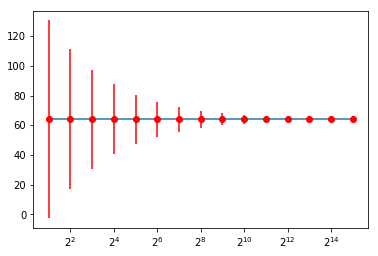

In [42]:
from matplotlib import pyplot as plt
import random
import numpy as np

number_people_in_the_room_list = [2**i for i in range(1,16)]
X,Y,Yerr = [],[],[]
for number_people_in_the_room in number_people_in_the_room_list:
    X.append(number_people_in_the_room)
    Y.append(64)
    Yerr.append(compute_confidence_interval(.64, number_people_in_the_room, 0.95)*100)
plt.clf()
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.errorbar(X, Y, fmt='ro', yerr=Yerr)
ax.plot(X, [64]*len(X))
plt.show()

In [43]:
for i,x in enumerate(X):
    print("For {0} surveyed persons, the percentage of persons watching the games is {1} (± {2})%".format(x, round(Y[i],1), round(Yerr[i],1)))

For 2 surveyed persons, the percentage of persons watching the games is 64.0 (± 66.5)%
For 4 surveyed persons, the percentage of persons watching the games is 64.0 (± 47.0)%
For 8 surveyed persons, the percentage of persons watching the games is 64.0 (± 33.3)%
For 16 surveyed persons, the percentage of persons watching the games is 64.0 (± 23.5)%
For 32 surveyed persons, the percentage of persons watching the games is 64.0 (± 16.6)%
For 64 surveyed persons, the percentage of persons watching the games is 64.0 (± 11.8)%
For 128 surveyed persons, the percentage of persons watching the games is 64.0 (± 8.3)%
For 256 surveyed persons, the percentage of persons watching the games is 64.0 (± 5.9)%
For 512 surveyed persons, the percentage of persons watching the games is 64.0 (± 4.2)%
For 1024 surveyed persons, the percentage of persons watching the games is 64.0 (± 2.9)%
For 2048 surveyed persons, the percentage of persons watching the games is 64.0 (± 2.1)%
For 4096 surveyed persons, the pe

### Comparing two proportions

Imagine you want to compare the evoluation of a percentage month over month. Let us use another example here. The news claim that satisfaction rate of citizens with the actions lead by the president dropped from 45% to 43%. A survey has been conducted on a sample of 1,000 persons.

**Question**: How can I assess whether this change is relevant or not?

The first solution would be to compare the confidence intervals of the two proportions.

In [46]:
satisfaction_rate_in_may = 0.45
satisfaction_rate_in_june = 0.43
number_of_surveyed_persons = 1000

confidence_may = compute_confidence_interval(satisfaction_rate_in_may, number_of_surveyed_persons, precision=0.95)
confidence_june = compute_confidence_interval(satisfaction_rate_in_june, number_of_surveyed_persons, precision=0.95)

print("The satisfaction rate in May is {0} (±{1})%".format(round(100*satisfaction_rate_in_may), round(100*confidence_may)))
print("The satisfaction rate in June is {0} (±{1})%".format(round(100*satisfaction_rate_in_june), round(100*confidence_june)))

The satisfaction rate in May is 45.0 (±3.0)%
The satisfaction rate in June is 43.0 (±3.0)%


In this case, we observe a decrease of 3pp of the satisfaction rate between May and June. The confidence intervals overlap but this is not enough to draw any conclusion.

**Question**: Can we directly compute a confidence interval on the decrease itself?

Yes, in a similar way to how we do it for the proportions:

$$e = z \displaystyle\sqrt{\dfrac{p_1(1-p_1)}{n_1} + \dfrac{p_2(1-p_2)}{n_2}}$$

where $p_1$ and $p_2$ are the percentages and $n_1$ and $n_2$ the number of surveyed persons, of respectively the first and the second month.

In [47]:
def compute_difference_confidence_interval(p1, n1, p2, n2, precision):
    zscore = abs(norm.ppf((1-precision)/2.))
    return zscore * math.sqrt(p1*(1-p1)/n1+p2*(1-p2)/n2)

satisfaction_rate_in_may = 0.45
satisfaction_rate_in_june = 0.43
number_of_surveyed_persons = 1000

confidence_difference_may_june = compute_difference_confidence_interval(satisfaction_rate_in_may, 
                                                                        number_of_surveyed_persons, 
                                                                        satisfaction_rate_in_june, 
                                                                        number_of_surveyed_persons, 
                                                                        precision=.95)

print("We observe between May and June a decrease of {0} (±{1}) pp of the satisfaction rate"
      .format(round(abs(100*(satisfaction_rate_in_may-satisfaction_rate_in_june))), 
              round(100*confidence_difference_may_june)))

We observe between May and June a decrease of 2.0 (±4.0) pp of the satisfaction rate


This means that the sample size of the surveyed population is too small to generalize to the rest of the country.